In [149]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv('index.csv')
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [152]:
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [154]:
data = data.set_index(data['date'], drop=True)

In [155]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [156]:
data['card'].value_counts()

card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
                       ..
ANON-0000-0000-0223     1
ANON-0000-0000-0222     1
ANON-0000-0000-0041     1
ANON-0000-0000-0219     1
ANON-0000-0000-0446     1
Name: count, Length: 446, dtype: int64

In [157]:
data = data.drop(['card', 'date'], axis=1)
data.head()

,datetime,cash_type,money,coffee_name
date,,,,
2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [158]:
data.loc[:,['cash_type','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
coffee_name,1133,8,Americano with Milk,268


In [159]:
data['cash_type'] = data['cash_type'].astype('category')

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1133 entries, 2024-03-01 to 2024-07-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1133 non-null   datetime64[ns]
 1   cash_type    1133 non-null   category      
 2   money        1133 non-null   float64       
 3   coffee_name  1133 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 36.6+ KB


In [161]:
data['datetime'] = pd.to_datetime(data['datetime']).dt.strftime('%H:%M')

In [162]:
data.head()

,datetime,cash_type,money,coffee_name
date,,,,
2024-03-01,10:15,card,38.7,Latte
2024-03-01,12:19,card,38.7,Hot Chocolate
2024-03-01,12:20,card,38.7,Hot Chocolate
2024-03-01,13:46,card,28.9,Americano
2024-03-01,13:48,card,38.7,Latte


In [172]:
data.tail()

,datetime,cash_type,money,coffee_name
date,,,,
2024-07-31,20:53,card,23.02,Cortado
2024-07-31,20:59,card,27.92,Americano with Milk
2024-07-31,21:26,card,32.82,Latte
2024-07-31,21:54,card,32.82,Latte
2024-07-31,21:55,card,32.82,Latte


Visualization

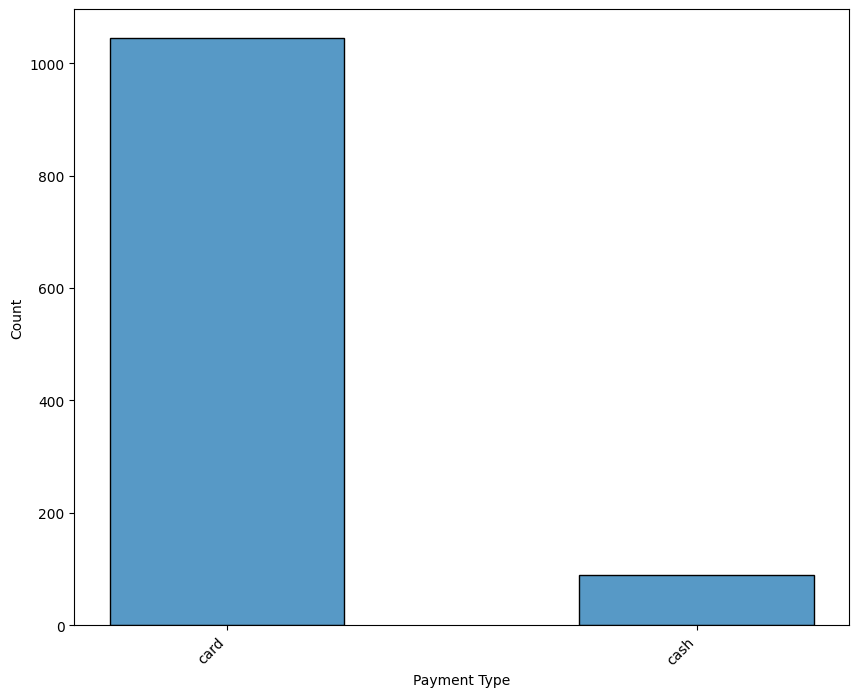

In [163]:
plt.figure(figsize=(10,8))
sns.histplot(data, x='cash_type', binwidth=3, shrink=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Payment Type')
plt.show()

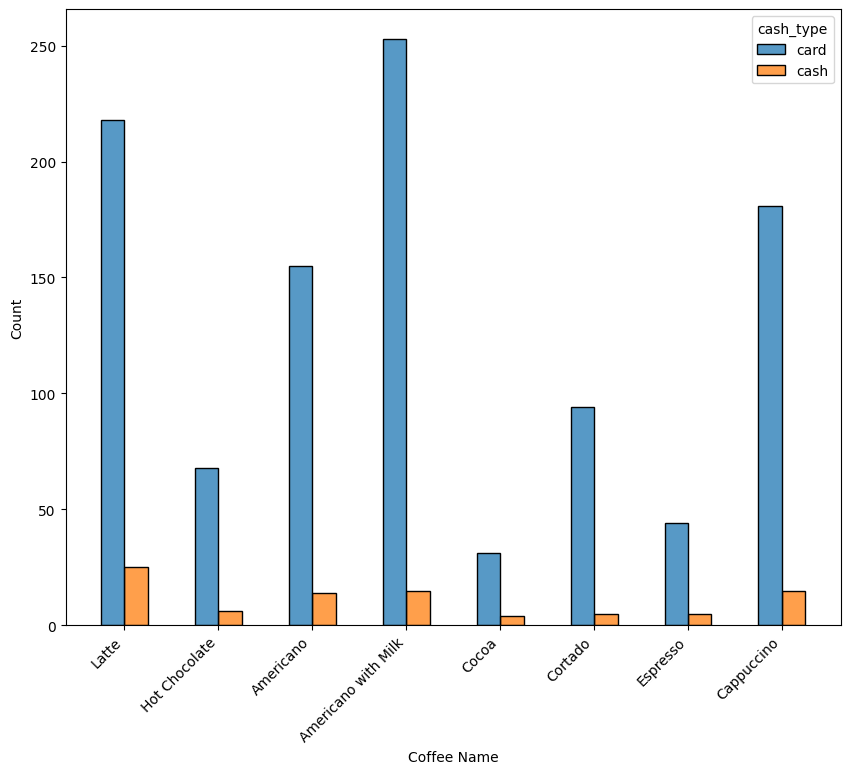

In [164]:
plt.figure(figsize=(10,8))
sns.histplot(data, x='coffee_name', hue='cash_type', multiple='dodge', binwidth=3, shrink=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Coffee Name')
plt.show()


Grouping

In [167]:
df = pd.DataFrame(data)
sales = df.groupby('coffee_name')['money'].sum().reset_index()
sales.head()

,coffee_name,money
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08


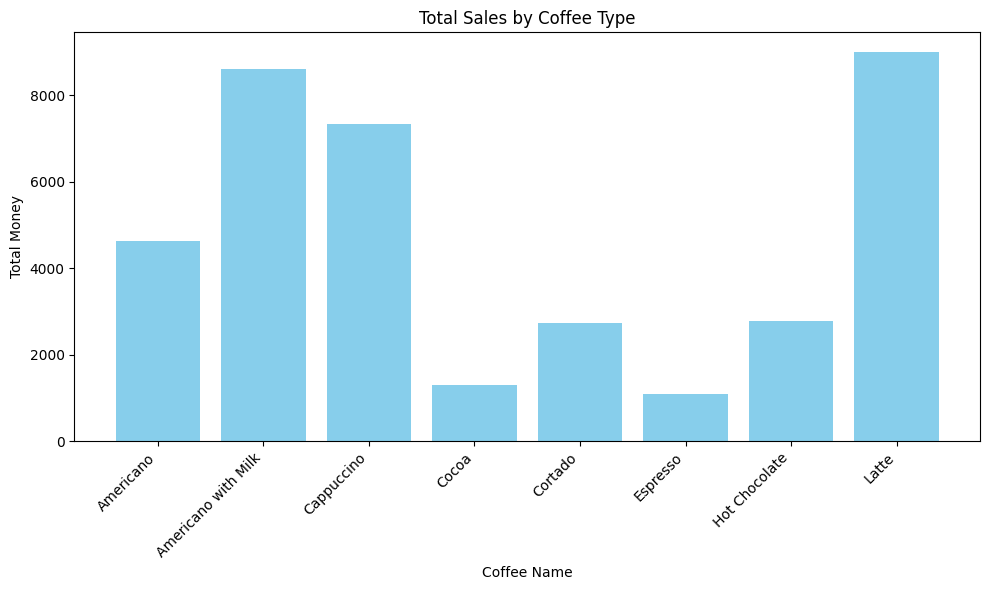

In [171]:
plt.figure(figsize=(10, 6))
plt.bar(sales['coffee_name'], sales['money'], color='skyblue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Money')
plt.title('Total Sales by Coffee Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [199]:
fig = go.Figure()
data['date_only'] = data.index.date
units_sold = data.groupby(['date_only', 'coffee_name']).size().reset_index(name='units_sold')

#Add a trace for each coffee type
coffee_types = units_sold['coffee_name'].unique()
for coffee in coffee_types:
    filtered_data = units_sold[units_sold['coffee_name'] == coffee]
    fig.add_trace(go.Scatter(x=filtered_data['date_only'], y=filtered_data['units_sold'], mode='lines+markers', name=coffee, visible=(coffee == coffee_types[0])))

#List of buttons for the dropdown menu
buttons = []
for coffee in coffee_types:
    buttons.append(dict(
        label=coffee,
        method="update",
        args=[{"visible": [trace.name == coffee for trace in fig.data]},
              {"title": f"Units Sold for {coffee}"}]
    ))

#Add the "All" button to show all traces
buttons.append(dict(
    label="All",
    method="update",
    args=[{"visible": [True] * len(fig.data)},
          {"title": "Units Sold by Coffee Type"}]
))

fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
        )
    ],
    title_text="Units Sold by Coffee Type",
    xaxis_title="Date",
    yaxis_title="Units Sold"
)
fig.show()